# Some examples of image manipulation for evaluating OCR

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading text from a file and render it to an image

In [2]:
# Read in some text
with open("Eisenhower.txt", 'r') as file:
    text = file.read()

print(text)

A vital element in keeping the peace is our military establishment.
Our arms must be mighty, ready for instant action, so that no 
potential aggressor may be tempted to risk his own destruction...

This conjunction of an immense military establishment and a large 
arms industry is new in the American experience. The total 
influence - economic, political, even spiritual - is felt in every 
city, every statehouse, every office of the federal government. We 
recognize the imperative need for this development. Yet we must not 
fail to comprehend its grave implications. Our toil, resources and 
livelihood are all involved; so is the very structure of our society.
In the councils of government, we must guard against the acquisition
of unwarranted influence, whether sought or unsought, by the 
military-industrial complex. The potential for the disastrous rise 
of misplaced power exists, and will persist. We must never let the 
weight of this combination endanger our liberties or democratic 


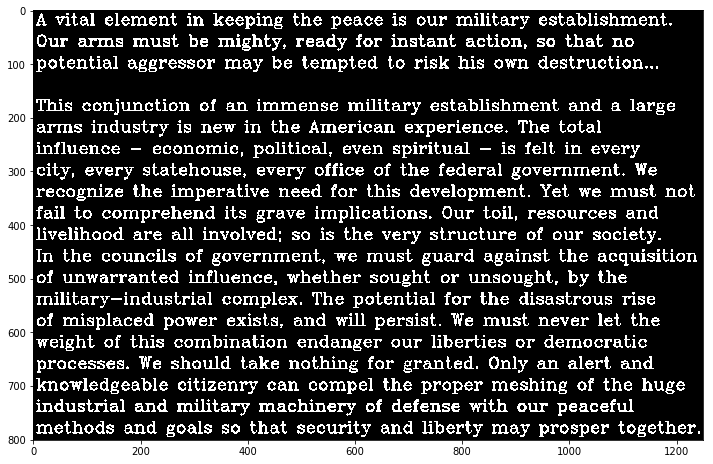

In [83]:
def render_text(texttorender):
    lines = texttorender.split('\n')
    img = np.zeros((len(lines)*40, np.max([len(line) for line in lines])*20))
    for n, textline in enumerate(lines):
        img = cv2.putText(img, textline, (10, (n+1)*40), cv2.FONT_HERSHEY_COMPLEX, 1.0, (255, 255, 255), 2, cv2.LINE_AA)
    return img

def autocrop(image):
    for axis in [0, 1]:
        s = np.sum(image>0, axis=axis)
        a = 0
        b = len(s)-1
        while s[a] == 0:
            a += 1
        a = max(a-5, 0)
        while s[b] == 0:
            b -= 1
        b = min(b+5, len(s)-1)
        if axis == 1:
            image = image[a:b+1, :]
        else:
            image = image[:, a:b+1]
    return image

img = render_text(text)
img = autocrop(img)
plt.figure(figsize=(12, 12))
plt.imshow(img, cmap='gray');

In [79]:
np.unique(img)

array([  0., 255.])